# Context

The Customer Experience department of United Air Lines Inc. (the client) are particularly interested in understanding more about flight delays in order to improve customer experience. The client would like to know which factors impact flight delays, how they compare to other airlines and how this analysis can be used to assist them with flight delays in the future. The client would also like to hear of any other insight opportunities they could pursue in the future.


# Loading data

In [2]:
# Data source resources/Data
import os
import pandas as pd
from typing import Union

data_ext: list[str] = [".csv", ".txt"]
data_path: str = os.getcwd() + "/resources/Data"

# airlines_df = pd.read_csv(data_path + "/airlines.csv")
# airports_df = pd.read_csv(data_path + "/airports.csv")
# data_dictionary_df = pd.read_csv(data_path + "/data_dictionary.txt")
# flights_df = pd.read_csv(data_path + "/flights.csv")
# planes_df = pd.read_csv(data_path + "/planes.csv")
# weather_df = pd.read_csv(data_path + "/weather.csv")

df_dict: dict[str:pd.DataFrame] = {
    "airlines": pd.read_csv(data_path + "/airlines.csv"),
    "airports": pd.read_csv(data_path + "/airports.csv"),
    "data_dict": pd.read_csv(data_path + "/data_dictionary.txt"),
    "flights": pd.read_csv(data_path + "/flights.csv"),
    "planes": pd.read_csv(data_path + "/planes.csv"),
    "weather": pd.read_csv(data_path + "/weather.csv")
}


# Data pre-processing and EDA

Inspect each dataframes to get an overview of the available data.

In [3]:
# Inspect dataframes
for df_name,df in df_dict.items():
    print(df_name)
    display(df.head())

airlines


,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


airports


,faa,name,lat,lon,alt,tz,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,America/New_York


data_dict


,table,column,description
0,airports,faa,airport code
1,airports,name,airport name
2,airports,lat,latitude
3,airports,lon,longitude
4,airports,alt,altitude


flights


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


planes


,tailnum,year,type,manufacturer,model,engines,seats,engine
0,N10156,2004.0,Fixed wing multi engine,embraer,EMB-145XR,2,55,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,embraer,EMB-145LR,2,55,Turbo-fan


weather


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


Do a sense check to check if the data makes sense and there isn't anything weird going on.

In [5]:
for df_name,df in df_dict.items():
    print(df_name)
    display(df.info())
    display(df.describe())

airlines
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   carrier  16 non-null     object
 1   name     16 non-null     object
dtypes: object(2)
memory usage: 384.0+ bytes


None

,carrier,name
count,16,16
unique,16,16
top,9E,Endeavor Air Inc.
freq,1,1


airports
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   faa     1458 non-null   object 
 1   name    1458 non-null   object 
 2   lat     1458 non-null   float64
 3   lon     1458 non-null   float64
 4   alt     1458 non-null   int64  
 5   tz      1458 non-null   int64  
 6   tzone   1458 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 79.9+ KB


None

,lat,lon,alt,tz
count,1458.000000,1458.000000,1458.000000,1458.000000
mean,41.648008,-103.392289,1001.415638,-6.518519
std,10.449509,29.843118,1523.626105,1.623016
min,19.721375,-176.646000,-54.000000,-10.000000
25%,34.257539,-119.185652,70.250000,-8.000000
50%,40.087722,-94.661854,473.000000,-6.000000
75%,45.067150,-82.516717,1062.500000,-5.000000
max,72.270833,174.113620,9078.000000,8.000000


data_dict
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   table        50 non-null     object
 1   column       50 non-null     object
 2   description  50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


None

,table,column,description
count,50,50,50
unique,5,41,46
top,flights,year,year
freq,18,3,3


flights
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  mi

None

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.152806,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.284595,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


planes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tailnum       3322 non-null   object 
 1   year          3252 non-null   float64
 2   type          3322 non-null   object 
 3   manufacturer  3322 non-null   object 
 4   model         3322 non-null   object 
 5   engines       3322 non-null   int64  
 6   seats         3322 non-null   int64  
 7   engine        3322 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 207.8+ KB


None

,year,engines,seats
count,3252.000000,3322.000000,3322.000000
mean,2000.484010,1.995184,154.316376
std,7.193425,0.117593,73.654974
min,1956.000000,1.000000,2.000000
25%,1997.000000,2.000000,140.000000
50%,2001.000000,2.000000,149.000000
75%,2005.000000,2.000000,182.000000
max,2013.000000,4.000000,450.000000


weather
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26115 entries, 0 to 26114
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   origin      26115 non-null  object 
 1   year        26115 non-null  int64  
 2   month       26115 non-null  int64  
 3   day         26115 non-null  int64  
 4   hour        26115 non-null  int64  
 5   temp        26114 non-null  float64
 6   dewp        26114 non-null  float64
 7   humid       26114 non-null  float64
 8   wind_dir    25655 non-null  float64
 9   wind_speed  26111 non-null  float64
 10  wind_gust   5337 non-null   float64
 11  precip      26115 non-null  float64
 12  pressure    23386 non-null  float64
 13  visib       26115 non-null  float64
 14  time_hour   26115 non-null  object 
dtypes: float64(9), int64(4), object(2)
memory usage: 3.0+ MB


None

,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,26115.0,26115.000000,26115.000000,26115.000000,26114.000000,26114.000000,26114.000000,25655.000000,26111.000000,5337.000000,26115.000000,23386.000000,26115.000000
mean,2013.0,6.503733,15.675321,11.490791,55.260392,41.439985,62.530059,199.761060,10.517488,25.487071,0.004469,1017.898751,9.255372
std,0.0,3.438328,8.762177,6.912423,17.787852,19.386236,19.395918,107.306847,8.539253,5.954958,0.030154,7.423827,2.055052
min,2013.0,1.000000,1.000000,0.000000,10.940000,-9.940000,12.740000,0.000000,0.000000,16.110920,0.000000,983.800000,0.000000
25%,2013.0,4.000000,8.000000,6.000000,39.920000,26.060000,47.050000,120.000000,6.904680,20.714040,0.000000,1012.900000,10.000000
50%,2013.0,7.000000,16.000000,11.000000,55.400000,42.080000,61.790000,220.000000,10.357020,24.166380,0.000000,1017.600000,10.000000
75%,2013.0,9.000000,23.000000,17.000000,69.980000,57.920000,78.790000,290.000000,13.809360,28.769500,0.000000,1023.000000,10.000000
max,2013.0,12.000000,31.000000,23.000000,100.040000,78.080000,100.000000,360.000000,1048.360580,66.745240,1.210000,1042.100000,10.000000


Assume that delayed flight is any flight that got delayed by more than 15 min. In this case we will only look at departures.

In [4]:
flight_df = df_dict["flights"].copy()

def categorise_flight_delays(dep_delay: str)-> str:
    if dep_delay>15:
        return "Delayed"
    elif dep_delay <= 15 and dep_delay >=-15:
        return "On time"
    else:
        return "Too early"

flight_df["Status"] = flight_df["dep_delay"].map(categorise_flight_delays)
flight_df["Status"] = pd.Categorical(values=flight_df["Status"], ordered=True, categories = ["Too early", "On time", "Delayed"])


Join flight data with airplane data and weather data:
- `flights` and `airplanes` can be joined using `tailnum` column.
- Weather data joined using time and location as join keys

In [13]:
# Join airplanes with flights
airplanes_flights_df = pd.merge(
    left=df_dict["flights"],
    right=df_dict["planes"],
    how="left",
    on="tailnum",
    suffixes=["_flight", "_plane"]
)

airplanes_flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 0 to 336775
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year_flight     336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [7]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'str' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool' = True, indicator: 'bool' = False, validate: 'str | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    Parameters
    ----------
    left : DataFrame
  

Weather data is most likely one of the factors that will influence flight delays. It would be useful to enrich the weather data with its geographic location. We can do that by joining `weather` dataframe with `airports` dataframe. This will open doors to some interesting exploratory data analysis options.

In [55]:
# Join airports dataframe to weather dataframe

weatherGeo_df = pd.merge(left=df_dict["airports"], right=df_dict["weather"],
    how="right", left_on="faa", right_on="origin", validate="one_to_many"
)
weatherGeo_df.drop(columns="faa", inplace=True)

In [54]:
print("How many (%) of the column data are nulls:")
print(weatherGeo_df.isnull().sum()/len(weatherGeo_df) * 100)

How many (%) of the column data are nulls:
name           0.000000
lat            0.000000
lon            0.000000
alt            0.000000
tz             0.000000
tzone          0.000000
origin         0.000000
year           0.000000
month          0.000000
day            0.000000
hour           0.000000
temp           0.003829
dewp           0.003829
humid          0.003829
wind_dir       1.761440
wind_speed     0.015317
wind_gust     79.563469
precip         0.000000
pressure      10.449933
visib          0.000000
time_hour      0.000000
dtype: float64


There are multiple ways to deal with nulls. In this case we will 
 - drop rows with <2% null values (most simple option and most data is preserved anyway)
 - try imputation for `pressure` and `wind_gust` column as it contains significant amount of data with null values. Before we do that we will look if there are any correlations or natural clusters from the data

In [57]:
# Drop nulls from ["temp", "dewp", "humid", "wind_dir", "wind_speed"]
drop_null_subset = ["temp", "dewp", "humid", "wind_dir", "wind_speed"]
weatherGeoDroppedNulls_df = weatherGeo_df.dropna(axis=0, subset=drop_null_subset)

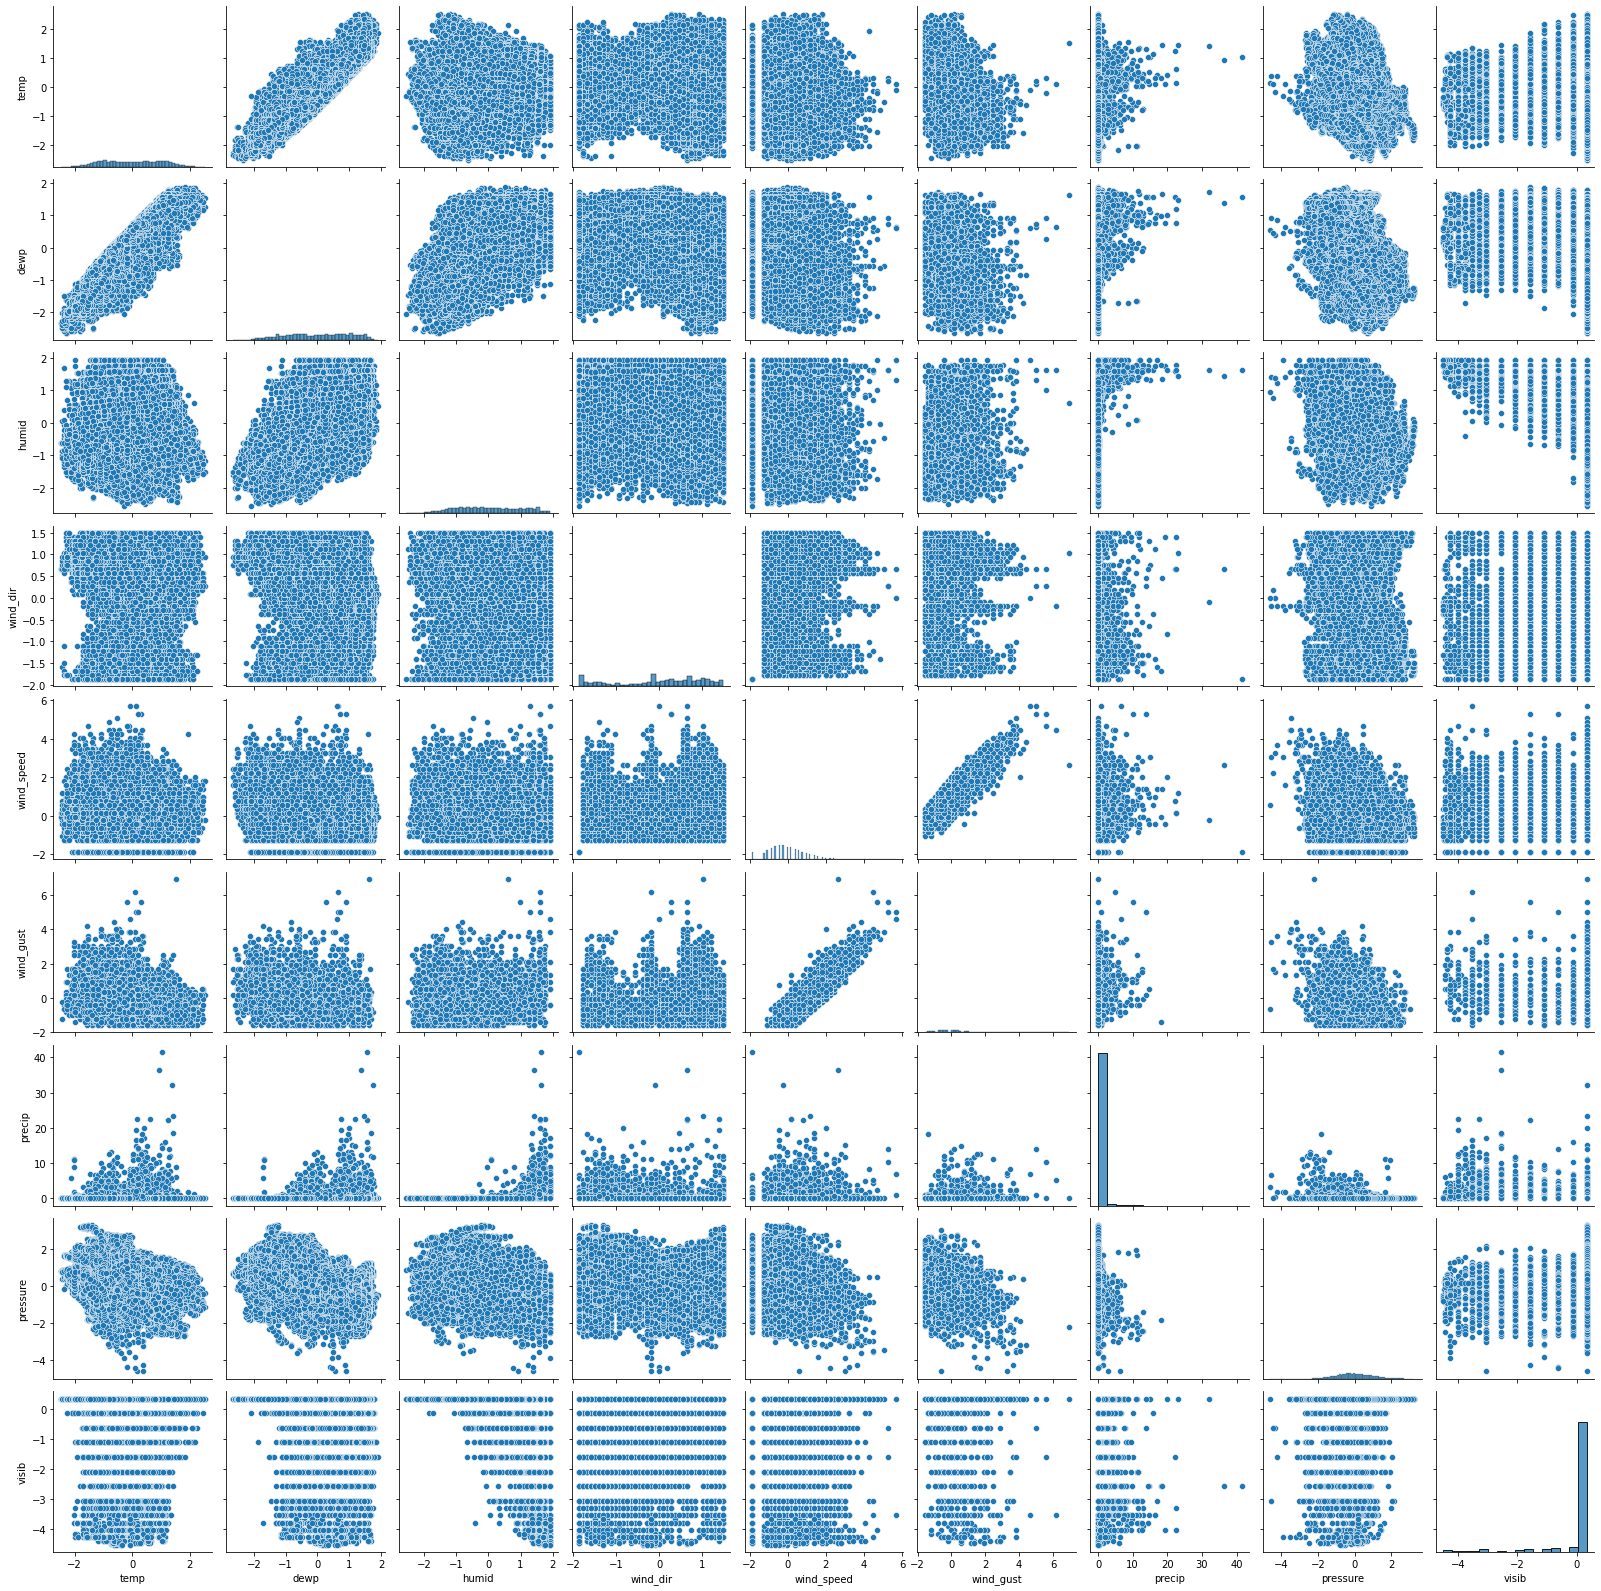

In [72]:
import seaborn as sns
import numpy as np

# Use seaborn to visualise relationship between different variables
df_vis = weatherGeoDroppedNulls_df[[
    "temp", "dewp", "humid", "wind_dir", "wind_speed",
    "wind_gust", "precip", "pressure", "visib"
    ]
]

df_vis = df_vis.loc[df_vis["wind_speed"] != df_vis["wind_speed"].max()]

sns.pairplot((df_vis-df_vis.mean())/df_vis.std())